In [1]:
import sys
sys.path.append('..')

In [2]:
from src.utils import load_data
import joblib
final_fraud_df = load_data('../data/01_processed/ecommerce_fraud_processed.csv')

PART 1: Building E-commerce Fraud Detection Models
--- Training and Evaluating: Logistic Regression (E-commerce) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     34241
           1       0.49      0.06      0.11      1828

    accuracy                           0.95     36069
   macro avg       0.72      0.53      0.54     36069
weighted avg       0.93      0.95      0.93     36069

Area Under the Precision-Recall Curve (AUC-PR): 0.1937



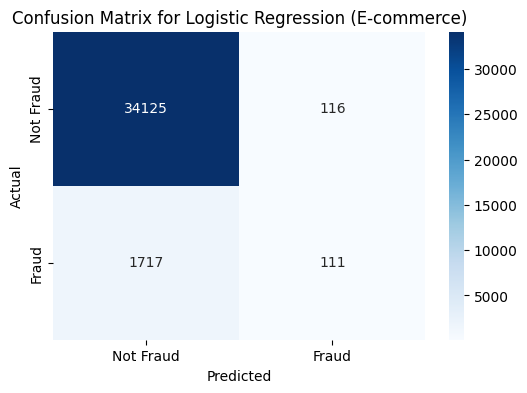

--- Training and Evaluating: XGBoost (E-commerce) ---


c:\Users\user\Documents\Datasience\fraud-detection-project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34241
           1       0.79      0.11      0.20      1828

    accuracy                           0.95     36069
   macro avg       0.87      0.56      0.59     36069
weighted avg       0.95      0.95      0.94     36069

Area Under the Precision-Recall Curve (AUC-PR): 0.2807



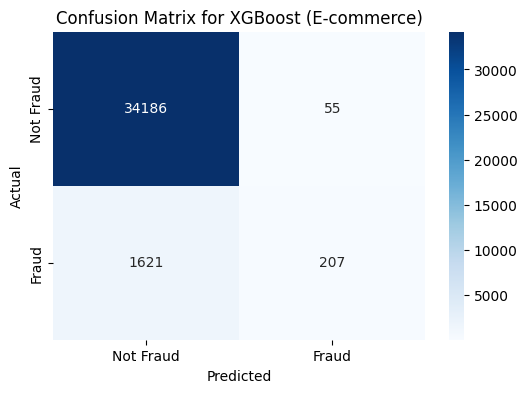

['xgboost_ecommerce.pkl']

In [ ]:
# Import necessary libraries and your new utils
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from src.utils import train_and_evaluate_model

# --------------------------------------------------------------------------
# PART 1: E-COMMERCE FRAUD MODEL
# --------------------------------------------------------------------------
print("="*60)
print("PART 1: Building E-commerce Fraud Detection Models")
print("="*60)

# Assume 'final_fraud_df' is your fully engineered dataframe
X_ecommerce = final_fraud_df.drop(columns=['class'])
y_ecommerce = final_fraud_df['class']
X_ecommerce_encoded = pd.get_dummies(X_ecommerce, drop_first=True)

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_ecommerce_encoded, y_ecommerce, test_size=0.25, random_state=42, stratify=y_ecommerce
)

scaler = StandardScaler()
X_train_e_scaled = scaler.fit_transform(X_train_e)
X_test_e_scaled = scaler.transform(X_test_e)

# --- Model Training using the utility function ---
lr_model_e = train_and_evaluate_model(
    LogisticRegression(random_state=42, max_iter=1000),
    X_train_e_scaled, y_train_e,
    X_test_e_scaled, y_test_e,
    model_name="Logistic Regression (E-commerce)"
)

xgb_model_e = train_and_evaluate_model(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    X_train_e_scaled, y_train_e,
    X_test_e_scaled, y_test_e,
    model_name="XGBoost (E-commerce)"
)
joblib.dump(lr_model_e, '../models/logistic_regression_ecommerce.pkl')

# Save XGBoost model
joblib.dump(xgb_model_e, '../models/xgboost_ecommerce.pkl')

# 📊 E-Commerce Fraud Detection: Model Evaluation Summary

This notebook analyzes two models for fraud detection on a highly **imbalanced dataset**:

* **Non-fraud cases**: 34,241
* **Fraud cases**: 1,828

---

## 1. 🔍 Logistic Regression (Baseline Model)

### 📌 Observation

* **Accuracy**: 95%
* **Fraud Class (1) Metrics**:

  * Recall: 0.06
  * Precision: 0.49
  * F1-Score: 0.11

### 📈 Interpretation

* High accuracy is misleading due to class imbalance.
* The model performs extremely well on **non-fraud cases** (Recall = 1.00), but fails to identify fraudulent transactions.
* **Recall = 0.06**: Only 6% of fraudulent transactions are caught.
* **Precision = 0.49**: When the model flags fraud, it’s correct \~half the time.

### ❌ Conclusion

> Logistic Regression is **not suitable** for fraud detection.
> It gives a **false sense of security** while failing at its primary task—**identifying fraud**.

---

## 2. ⚔️ XGBoost (Challenger Model)

### 📌 Observation

* **Accuracy**: 95%
* **Fraud Class (1) Metrics**:

  * Recall: 0.11
  * Precision: 0.79
  * F1-Score: 0.20
  * AUC-PR: 0.2807

### 📈 Interpretation

* Accuracy remains high, but now recall improves from 6% → 11%.
* **Precision = 0.79**: When fraud is flagged, it’s correct nearly 80% of the time—much more reliable.
* Higher F1-score and AUC-PR indicate **superior performance on the minority class**.

### ✅ Conclusion

> XGBoost is a **clear improvement** over Logistic Regression.
> It delivers **better recall** and **more reliable fraud alerts**, making it far more effective for practical use.

---

## 🧾 Model Comparison Summary

| Metric    | Logistic Regression | XGBoost | ✅ Winner | Reason                               |
| --------- | ------------------- | ------- | -------- | ------------------------------------ |
| Precision | 0.49                | 0.79    | XGBoost  | Fewer false alarms                   |
| Recall    | 0.06                | 0.11    | XGBoost  | Detects almost 2x more fraud         |
| F1-Score  | 0.11                | 0.20    | XGBoost  | Better balance of precision & recall |
| AUC-PR    | 0.1937              | 0.2807  | XGBoost  | Stronger on minority class detection |

---

## 🏁 Verdict

> **XGBoost is the best model for this fraud detection task.**
> Although the **recall is still low (11%)**, XGBoost is **far superior** to the baseline in identifying fraud while maintaining high precision.
> It offers a **strong foundation** for further improvements and is a promising step toward a production-ready solution.
